# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис, в котором пользователи могут редактировать и дополнять описания товаров как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

<b>Задача</b>: обучить модель классифицировать комментарии на позитивные и негативные. В нашем распоряжении набор данных с разметкой о токсичности правок. 

Метрика качества *F1* должна быть не меньше 0.75. 

<b>Данные</b> находятся в файле "toxic_comments.csv". В столбце "text" содержится текст комментариев, а в "toxic" — целевой признак (0 и 1).

Метрика F1 - это среднегармоничное значение между precision и recall. В данном проекте заказчику важны и точность, и полнота. Точность - сколько действительно негативных комментариев модель отнесла к классу 1 и нейтральных к классу 0. А полнота - сколько модель нашла негативных комментариев среди всех негативных комментариев. В случае метрики F1 модель находит оптимальный баланс между точностью и полнотой.

Если бы заказчику было важнее найти как можно больше токсичных комментариев, мы бы воспользовались метрикой Полнота(recall). В этом случае учтен был бы каждый токсичный комментарий, попавший или не попавший в класс 1.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-и-изучение-данных" data-toc-modified-id="Подготовка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка и изучение данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Подготовка-данных-к-обучению" data-toc-modified-id="Подготовка-данных-к-обучению-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных к обучению</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Мешок-слов" data-toc-modified-id="Мешок-слов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Мешок слов</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#SGDClassifier" data-toc-modified-id="SGDClassifier-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>SGDClassifier</a></span></li><li><span><a href="#Наивный-Байес" data-toc-modified-id="Наивный-Байес-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Наивный Байес</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#TF-IDF-кодирование" data-toc-modified-id="TF-IDF-кодирование-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>TF-IDF кодирование</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#SGDClassifier" data-toc-modified-id="SGDClassifier-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>SGDClassifier</a></span></li><li><span><a href="#Наивный-Байес" data-toc-modified-id="Наивный-Байес-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Наивный Байес</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Эмбеддинги-BERT" data-toc-modified-id="Эмбеддинги-BERT-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Эмбеддинги BERT</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Подготовка и изучение данных

### Загрузка и изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import warnings
import torch
import transformers

# для лемматизации текста
from nltk.stem import WordNetLemmatizer
# для стоп-слов
from nltk.corpus import stopwords as nltk_stopwords
# для лемматизации с POS тегом
from nltk.corpus import wordnet
# для подсчета самых частовстречающихся слов в корпусе
from nltk.probability import FreqDist
# разбитие текста на слова
from nltk import word_tokenize
# для создания "облако тегов"
from wordcloud import WordCloud
# для создания мешков слов
from sklearn.feature_extraction.text import CountVectorizer
# для использования TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
# для разделения выборок
from sklearn.model_selection import train_test_split
# для перемешивания данных в выборке
from sklearn.utils import shuffle
# для подбора параметров GridSearchCV и кросс-валидации
from sklearn.model_selection import GridSearchCV, cross_val_score
# для создания pipeline
from sklearn.pipeline import Pipeline
# для вычисления F1-меры
from sklearn.metrics import f1_score
# для построения модели Случайный лес
from sklearn.ensemble import RandomForestClassifier
# для построения модели Логистическая регрессия
from sklearn.linear_model import LogisticRegression
# для построения модели SGD
from sklearn.linear_model import SGDClassifier
# для построения модели Наивный Байес
from sklearn.naive_bayes import ComplementNB, BernoulliNB
# для построения модели Метод опорных векторов
from sklearn.svm import SVC
# библиотека CatBoost
from catboost import CatBoostClassifier
# предобученная модель BERT и ее токенизатор
from transformers import AutoTokenizer, AutoModel

# лемматизация
nltk.download('wordnet')
# делит текст на список предложений
nltk.download('punkt')
# удаление стоп-слов
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
stopwords = set(nltk_stopwords.words('english'))
# убрать вывод уведомлений
warnings.filterwarnings('ignore')

2022-12-13 20:52:34.247597: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package wordnet to /Users/Tasha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Tasha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Tasha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/Tasha/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Tasha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-

In [2]:
data = pd.read_csv('toxic_comments.csv', index_col=0)
data.sample(10)

,text,toxic
156472,"""\n\nI don't plan to expand it further. If you...",0
14012,"""\n\n pic for storm \n\nHi Julian, which is th...",0
62691,Meaning of the song \n\nWhat's the meaning of ...,0
139445,I am tired of neurotic idiots messing with my ...,1
21868,"Come Join Us\n\nHey, I left a comment on [List...",0
50334,.And why did you delete the facts,0
72964,"""\n\n Missing affix defining ligands \nA troll...",1
114443,]] \n Archive 3 \n Archive 4 \n [[/Archive 5/|...,0
54385,Thank you for not reverting the subject headin...,0
112088,"""\n\nWalk away, I got this now. ♠♣♥♦™№1185©♪♫® """,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [4]:
data['toxic'].unique()

array([0, 1])

In [5]:
# проверим на дубликаты
data.duplicated().sum()

0

Датасет состоит из 159292 строк и 2 столбцов. В столбце "text" тексты на английском языке. В столбце "toxic" значения только 0 и 1. 

Данные в целевом признаке сохранены типом int64, можно заменить на int8 для уменьшения занимаемой памяти. 
Пропусков и дубликатов в данных нет.

In [6]:
data['toxic'] = data['toxic'].astype('int8')

Посмотрим, каким комментариям (позитивным или негативным) соответствуют единицы и нули в столбце "toxic".

In [7]:
data.query('toxic == 1').sample(10)

,text,toxic
67583,You dirty bastards. Arse!,1
27522,Do you know how pathetic you look with your si...,1
128858,JIMMY WALES IS A HOMO,1
75096,"LOL what a load of unsourced, unscientific bul...",1
887,"you gay motherfucker i know where you live,i a...",1
74186,"""\nFor everyone's info I don't give a flying f...",1
33875,"""\n\n Hey dick \nYou don't know what is copyri...",1
72896,fuck you \nhow about you fuck off you fucking ...,1
150443,INTEVIEW \n\nME: ARE YOU GAY?\n\nABE GAY DASHI...,1
71529,twat \n\nyour a twat and im not checking back ...,1


In [8]:
data.query('toxic == 0').sample(10)

,text,toxic
158887,"So, how are WE interpreting it? Your response ...",0
54157,"REDIRECT Talk:Gorenje Kamenje, Novo Mesto",0
42481,Commons does not follow our naming conventions...,0
150380,"""::LjL, carefully read the following caption, ...",0
48028,"""\n\n Not every hex code has an exact name. It...",0
22163,We're probably struggling to agree. My general...,0
120242,You are quie sure I can more sources that say ...,0
87617,—Preceding unsigned comment added by (talk • ...,0
138245,"""\n\n Please do not remove content from pages ...",0
72780,"""\n\nWelcome!\n\nHello, , and welcome to Wikip...",0


Единицы - это токсичные (негативные) комментарии, нули - обычные или позитивные. 

In [9]:
data['toxic'].value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

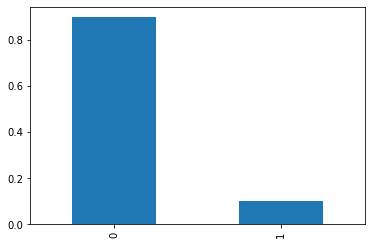

In [10]:
data['toxic'].value_counts(normalize=True).plot(kind='bar');

Токсичных комментариев почти в 9 раз меньше, чем обычных. Выборка несбалансирована. Позже рассмотрим несколько способов борьбы с дисбалансом, обучим модели и сравним их качество.

<b>Вывод</b>:
- изучили данные, количество столбцов и строк
- изменили тип данных в целевом признаке
- пропусков и дубликатов нет
- выборка несбалансированная
- значение 1 в целевом признаке - это токсичный/негативный комментарий, 0 - нейтральный/позитивный
- тексты с комментариями на английском языке, в текстах много мусора (спец.символы, знаки препинания)
- можно приступать к подготовке данных к обучению

### Подготовка данных к обучению

Подготовим признаки и целевой признак перед обучением моделей. Напишем функции лемматизации и очистки текста (оставим только буквы латинского алфавита и пробелы). Также весь текст приведем к нижнему регистру.

Для лемматизации используем библиотеку NLTK.

In [11]:
# функция для определения части речи слова - POS tag
def get_wordnet_pos(text):
    tag = nltk.pos_tag([text])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [12]:
lemmatizer = WordNetLemmatizer()

In [13]:
# функция лемматизации
def lemmatize(text):
    text = text.lower()
    word_list = nltk.word_tokenize(text)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_list])  
    return lemmatized_output

# функция очистки текста от "мусора"
def clear_text(text):
    text = re.sub(r"[^a-zA-Z']", ' ', text)
    return ' '.join(text.split()) 

In [14]:
%%time

data['lemma'] = data['text'].apply(lambda x: lemmatize(clear_text(x)))

CPU times: user 18min 20s, sys: 1min 33s, total: 19min 54s
Wall time: 20min 22s


In [15]:
# проверим работу функций
data.head()

,text,toxic,lemma
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits make under my userna...
1,D'aww! He matches this background colour I'm s...,0,d'aww he match this background colour i 'm see...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i 'm really not try to edit war it 's ...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i ca n't make any real suggestion on impr...
4,"You, sir, are my hero. Any chance you remember...",0,you sir be my hero any chance you remember wha...


Мы добавили столбец "lemma", в котором лемматизировали очищенные тексты из столбца "text". Создадим облако тегов - самые популярные слова в корпусе.

In [16]:
# соединим все тексты из data['lemma'] в одну строку
text = " ".join(comment for comment in data['lemma'])

In [17]:
# разобьем текст на слова
slova = word_tokenize(text)

In [18]:
# удалим стоп-слова
slova = [word for word in slova if word not in stopwords]

In [19]:
# посчитаем кол-во каждого слова
fdist = FreqDist(slova)

In [20]:
# топ-10 популярных слов
fdist.most_common(20)

[('article', 74383),
 ("'s", 66736),
 ('page', 57109),
 ("n't", 57039),
 ('wikipedia', 48461),
 ('talk', 40391),
 ('use', 31952),
 ('edit', 30786),
 ('would', 30767),
 ('one', 30634),
 ('make', 30451),
 ('please', 29764),
 ('like', 28648),
 ('see', 25486),
 ('say', 25401),
 ('source', 23850),
 ('know', 23424),
 ('get', 22430),
 ('think', 21851),
 ('go', 21790)]

In [21]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

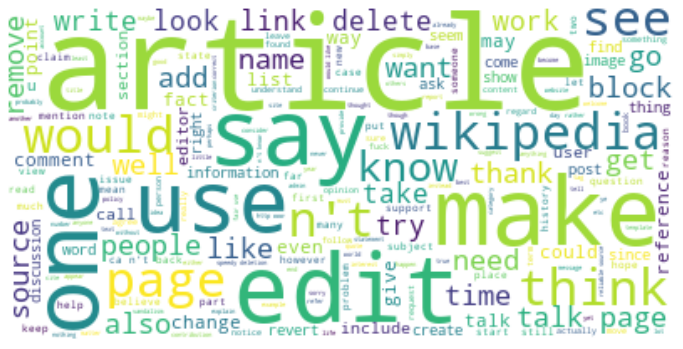

In [22]:
plt.figure(figsize=[12,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

 Теперь можно создать переменные для признаков и целевого признака и разбить датасет на обучающую и тестовую выборки.

In [23]:
features = data['lemma']
target = data['toxic']

In [24]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=2501, stratify = target)

In [25]:
# проверим размеры выборок
for i in (features_train, features_test, target_train, target_test):
    print(i.shape)

(119469,)
(39823,)
(119469,)
(39823,)


In [26]:
target_train.value_counts(normalize=True)

0    0.898392
1    0.101608
Name: toxic, dtype: float64

In [27]:
target_test.value_counts(normalize=True)

0    0.898375
1    0.101625
Name: toxic, dtype: float64

Выборки пропорционально изначальному датасету несбалансированные по классам. Попробуем обучить модели на несбалансированных данных, с параметром class_weight='balanced' и с использованием ресемплирования с уменьшением класса 0 (для "тяжеловесных"). Скорее всего на oversample датасете на валидационной выборке результат метрики F1 у моделей будет завышен, а на тестовой более низкий результат. Но проверить стоит 🙃

Чтобы уменьшить выборку с нулевыми целевыми признаками, нужно:
- разделить обучающую выборку на отрицательные и положительные объекты
- случайным образом отбросить часть из отрицательных объектов
- с учётом полученных данных создать новую обучающую выборку
- перемешать данные

In [28]:
# разделили выборки на 0 и 1
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

In [29]:
# проверим размеры выборок
for i in (features_zeros, features_ones, target_zeros, target_ones):
    print(i.shape)

(107330,)
(12139,)
(107330,)
(12139,)


In [30]:
# удалили часть отрицательных ответов
features_downsampled = pd.concat([features_zeros.sample(frac=0.11, random_state=2501)] \
                                 + [features_ones])
target_downsampled = pd.concat([target_zeros.sample(frac=0.11, random_state=2501)] + \
                               [target_ones])

In [31]:
# перемешали данные
features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, \
                                                   random_state=2501)

In [32]:
target_downsampled.value_counts(normalize=True)

1    0.506953
0    0.493047
Name: toxic, dtype: float64

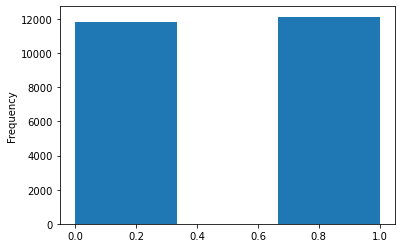

In [33]:
target_downsampled.plot(kind ='hist', bins=3);

In [34]:
print(features_downsampled.shape)
target_downsampled.shape

(23945,)


(23945,)

Теперь наши выборки сбалансированы по классам.

<b>Вывод</b>:
- лемматизировали и очистили от мусора исходный текст комментариев
- создали список самых частоупотребляемых слов и вывели "облако тегов"
- создали переменные для признака и таргета
- разделили данные на 4 выборки: 2 обучающие и 2 тестовые
- сделали дополнительную разбивку выборок с ресемплированием для борьбы с дисбалансом классов

## Обучение

Для обучения моделей нам нужно закодировать признаки - сделать из слов вектора. Будем использовать 3 способа:
- мешок слов
- TF-IDF кодирование
- создание BERT-эмбеддингов

После векторизации обучим модели и найдем метрику F1 для каждой модели, выберем наилучшую модель.

### Мешок слов

In [35]:
# преобразуем корпус текстов в мешок слов, создав счетчик
count_vect = CountVectorizer(stop_words = stopwords)

#### Случайный лес

In [36]:
# для Случайного леса
pipeline_forest = Pipeline(steps=[
    ('vectorizer', count_vect),
    ('dt_estimator', RandomForestClassifier(random_state=2501))
])

In [37]:
%%time

param_grid = {'dt_estimator__max_depth': range(1, 7),
              'dt_estimator__n_estimators': range(1, 42, 10)}

grid_search_forest_bow = GridSearchCV(pipeline_forest, param_grid, cv=3, scoring='f1', n_jobs=1)
grid_search_forest_bow.fit(features_train, target_train)
f1_forest_bow = grid_search_forest_bow.best_score_

print(f'F1 Случайного леса: {f1_forest_bow}') 
print(f'Лучшие гиперпараметры: {grid_search_forest_bow.best_params_}')

F1 Случайного леса: 0.07983421337702025
Лучшие гиперпараметры: {'dt_estimator__max_depth': 6, 'dt_estimator__n_estimators': 1}
CPU times: user 7min 35s, sys: 8.19 s, total: 7min 43s
Wall time: 7min 46s


С несбалансированными выборками значение метрики F1 катастрофически низкое. Также обучение модели происходит достаточно долго (более 8 минут). Попробуем использовать агрумент class_weight='balanced'.

In [38]:
# для Случайного леса с class_weight='balanced'
pipeline_forest_cwb = Pipeline(steps=[
    ('vectorizer', count_vect),
    ('dt_estimator', RandomForestClassifier(random_state=2501, class_weight='balanced'))
])

In [39]:
%%time

param_grid = {'dt_estimator__max_depth': range(1, 7),
              'dt_estimator__n_estimators': range(1, 42, 10)}

grid_search_forest_cwb_bow = GridSearchCV(pipeline_forest_cwb, param_grid, cv=3, scoring='f1', \
                                          n_jobs=1)
grid_search_forest_cwb_bow.fit(features_train, target_train)
f1_forest_cwb_bow = grid_search_forest_cwb_bow.best_score_

print(f'F1 Случайного леса с class_weight="balanced": {f1_forest_cwb_bow}') 
print(f'Лучшие гиперпараметры: {grid_search_forest_cwb_bow.best_params_}')

F1 Случайного леса с class_weight="balanced": 0.3210159961766624
Лучшие гиперпараметры: {'dt_estimator__max_depth': 6, 'dt_estimator__n_estimators': 41}
CPU times: user 8min 1s, sys: 11.8 s, total: 8min 12s
Wall time: 8min 31s


С аргументом class_weight='balanced' метрика улучшилась, но тоже очень низкая. Время обучения такое же.

#### Логистическая регрессия

На прошлой модели явно видно, что с несбалансированными выборками модели обучаются намного хуже и медленнее. Далее будем использовать аргумент class_weight='balanced' для несбалансированных выборок.

In [40]:
# для Логистической регрессии
pipeline_logreg = Pipeline(steps=[
    ('vectorizer', count_vect),
    ('dt_estimator', LogisticRegression(class_weight='balanced'))
])

In [41]:
%%time

param_grid = {'dt_estimator__max_iter': [1000],
             'dt_estimator__solver':['newton-cg', 'lbfgs', 'liblinear'],
             'dt_estimator__C': [0.1, 1, 10]}

grid_search_log_cwb_bow = GridSearchCV(pipeline_logreg, param_grid, cv=3, scoring='f1', n_jobs=1)
grid_search_log_cwb_bow.fit(features_train, target_train)
f1_logreg_cwb_bow = grid_search_log_cwb_bow.best_score_

print(f'F1 Логистической регрессии: {f1_logreg_cwb_bow}') 
print(f'Лучшие гиперпараметры: {grid_search_log_cwb_bow.best_params_}')

F1 Логистической регрессии: 0.7540084662423853
Лучшие гиперпараметры: {'dt_estimator__C': 1, 'dt_estimator__max_iter': 1000, 'dt_estimator__solver': 'newton-cg'}
CPU times: user 20min 22s, sys: 10.6 s, total: 20min 33s
Wall time: 11min 28s


Значение F1 у Логистической регрессии на обучающей выборке чуть больше, чем надо для проекта. Скорость обучения заметно увеличилась по сравнению с обучением Случайного леса.

#### CatBoost

In [42]:
# для CatBoost
pipeline_cat = Pipeline(steps=[
    ('vectorizer', count_vect),
    ('dt_estimator', CatBoostClassifier(eval_metric = 'F1', iterations=50, verbose=0, \
                                        random_state=2501, has_time=True))
])

Модель CatBoost очень долго обучалась на несбалансированной выборке, я не смогла дождаться результата. Поэтому принято решение использовать уменьшенную сбалансированную обучающую выборку. Проверим результат.

In [43]:
%%time

param_grid = [{
    'dt_estimator__learning_rate': [0.03, 0.1],
    'dt_estimator__depth': [1, 10],
    'dt_estimator__l2_leaf_reg': [3, 5, 7, 9]
}]

grid_search_cat_down_bow = GridSearchCV(pipeline_cat, param_grid, cv=3, scoring='f1', n_jobs=1)
grid_search_cat_down_bow.fit(features_downsampled, target_downsampled)

f1_catboost_down_bow = grid_search_cat_down_bow.best_score_

print(f'F1 CatBoost: {f1_catboost_down_bow}') 
print(f'Лучшие гиперпараметры: {grid_search_cat_down_bow.best_params_}')

F1 CatBoost: 0.824931509450949
Лучшие гиперпараметры: {'dt_estimator__depth': 10, 'dt_estimator__l2_leaf_reg': 3, 'dt_estimator__learning_rate': 0.1}
CPU times: user 32min 47s, sys: 25.3 s, total: 33min 12s
Wall time: 11min 20s


Значение метрики F1 хорошее, но очень большое время обучения модели по сравнению с логистической регрессией.

#### SGDClassifier

In [44]:
# для SGDClassifier
pipeline_sgd = Pipeline(steps=[
    ('vectorizer', count_vect),
    ('dt_estimator', SGDClassifier(random_state=2501, class_weight='balanced'))
])

Для модели SGD также использовали уменьшенную сбалансированную обучающую выборку, так как обучение на несбалансированной очень долгое.

In [45]:
%%time

param_grid = [{
    'dt_estimator__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'dt_estimator__loss': ['hinge', 'log', 'modified_huber'],
    'dt_estimator__eta0': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
}]

grid_search_sgd_down_bow = GridSearchCV(pipeline_sgd, param_grid, cv=3, scoring='f1', n_jobs=1)
grid_search_sgd_down_bow.fit(features_downsampled, target_downsampled)

f1_sgd_down_bow = grid_search_sgd_down_bow.best_score_

print(f'F1 SGD: {f1_sgd_down_bow}') 
print(f'Лучшие гиперпараметры: {grid_search_sgd_down_bow.best_params_}')

F1 SGD: 0.887959152978682
Лучшие гиперпараметры: {'dt_estimator__eta0': 0.1, 'dt_estimator__learning_rate': 'adaptive', 'dt_estimator__loss': 'log'}
CPU times: user 4min 45s, sys: 4.61 s, total: 4min 50s
Wall time: 4min 4s


Модель SGDClassifier показала хороший результат, обучалась намного быстрее модели CatBoost.

#### Наивный Байес

In [46]:
# Наивный Байес Complement
pipeline_nbc = Pipeline(steps=[
    ('vectorizer', count_vect),
    ('dt_estimator', ComplementNB())
])

In [47]:
%%time

param_grid = [{
    'dt_estimator__alpha': [1.0, 0.0, 0.5],
    'dt_estimator__fit_prior': [True, False]
}]

grid_search_nbc_bow = GridSearchCV(pipeline_nbc, param_grid, cv=3, scoring='f1', n_jobs=1)
grid_search_nbc_bow.fit(features_train, target_train)
f1_nbc_bow = grid_search_nbc_bow.best_score_

print(f'F1 Наивного Байеса Complement: {f1_nbc_bow}') 
print(f'Лучшие гиперпараметры: {grid_search_nbc_bow.best_params_}')

F1 Наивного Байеса Complement: 0.675505256572983
Лучшие гиперпараметры: {'dt_estimator__alpha': 1.0, 'dt_estimator__fit_prior': True}
CPU times: user 1min 31s, sys: 1.86 s, total: 1min 33s
Wall time: 1min 34s


Наивный Байес Complement обучился очень быстро, но метрика F1 достаточно низкая.

In [48]:
# Наивный Байес Бернулли
pipeline_nbc_ber = Pipeline(steps=[
    ('vectorizer', count_vect),
    ('dt_estimator', BernoulliNB())
])

In [49]:
%%time

param_grid = [{
    'dt_estimator__alpha': [1.0, 0.0, 0.5],
    'dt_estimator__fit_prior': [True, False]
}]

grid_search_nbc_ber_bow = GridSearchCV(pipeline_nbc_ber, param_grid, cv=3, scoring='f1', n_jobs=1)
grid_search_nbc_ber_bow.fit(features_train, target_train)
f1_nbc_ber_bow = grid_search_nbc_ber_bow.best_score_

print(f'F1 Наивного Байеса Бернулли: {f1_nbc_ber_bow}') 
print(f'Лучшие гиперпараметры: {grid_search_nbc_ber_bow.best_params_}')

F1 Наивного Байеса Бернулли: 0.7060035288437295
Лучшие гиперпараметры: {'dt_estimator__alpha': 1.0, 'dt_estimator__fit_prior': False}
CPU times: user 1min 30s, sys: 1.65 s, total: 1min 31s
Wall time: 1min 32s


Обе модели на основе Наивного Байеса (распределение Бернулли и мультиномиальное распределение) обучились мгновенно, но качество ответов не удовлетворяет нашему условию. 

#### Вывод

In [50]:
# соберем все в одной таблице
total = pd.DataFrame(columns=['F1'],
                    index=['Случайный лес несбаланс.выборки', 
                           'Случайный лес balanced', 
                           'Логистическая регрессия balanced',
                           'CatBoost',
                           'SGDClassifier',
                          'Наивный Байес Complement',
                          'Наивный Байес Бернулли'],
                    data=[f1_forest_bow, f1_forest_cwb_bow, f1_logreg_cwb_bow,
                          f1_catboost_down_bow, f1_sgd_down_bow, f1_nbc_bow, 
                          f1_nbc_ber_bow])
total

,F1
Случайный лес несбаланс.выборки,0.079834
Случайный лес balanced,0.321016
Логистическая регрессия balanced,0.754008
CatBoost,0.824932
SGDClassifier,0.887959
Наивный Байес Complement,0.675505
Наивный Байес Бернулли,0.706004


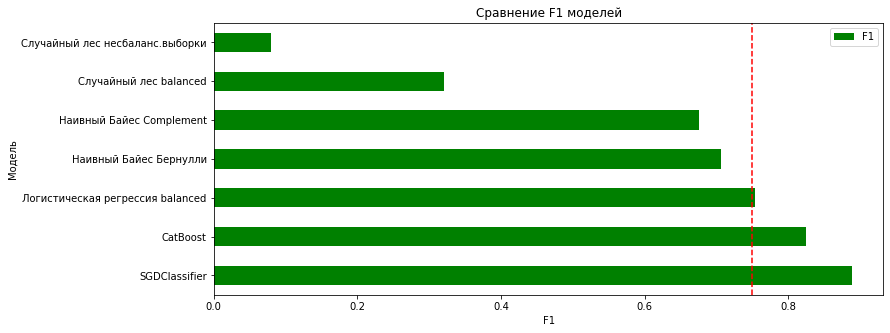

In [51]:
total.sort_values(by='F1', ascending=False).plot.barh(y='F1', figsize=(12,5), color='green')
plt.title('Сравнение F1 моделей')
plt.xlabel('F1')
plt.ylabel('Модель')
plt.axvline(x=0.75, color='r', linestyle='--')
plt.show()

В ходе обучения моделей с помощью векторизации Мешок слов можно сделать следующие выводы:
- на несбалансированных выборках модели обучаются очень медленно и показывают очень плохие результаты F1, было принято решение для обучения некоторых моделей использовать только сбалансированные выборки
- модели Случайный лес, Наивный Байес показали F1 ниже заданного уровня
- остальные модели показали на обучающей выборке метрики F1 выше требуемого 0.75
- быстрее всех обучается модель Наивный Байес (менее 2-х минут), CatBoost обучается очень долго - более 36 минут, SGD - чуть более 5 минут
- на данном этапе проекта для проверки на тестовых данных лучшая модель Логистическая регрессия, так как она показала метрику выше 0.75, обучалась на полном датасете и ее время обучения допустимое (чуть более 20 минут).

### TF-IDF кодирование

Воспользуемся другим способом кодирование признаков TF-IDF: TF отвечает за количество упоминаний слова в отдельном тексте, а IDF отражает частоту его употребления во всём корпусе. Вместе они дают оценку важности слова во всем корпусе.

In [52]:
# объявляем векторизатор
count_tf_idf = TfidfVectorizer(stop_words = stopwords)

#### Случайный лес

In [53]:
# для Случайного леса
pipeline_forest = Pipeline(steps=[
    ('vectorizer', count_tf_idf),
    ('dt_estimator', RandomForestClassifier(random_state=2501))
])

In [54]:
%%time

param_grid = {'dt_estimator__max_depth': range(1, 7),
              'dt_estimator__n_estimators': range(1, 42, 10)}

grid_search_forest_tf = GridSearchCV(pipeline_forest, param_grid, cv=3, scoring='f1', n_jobs=1)
grid_search_forest_tf.fit(features_train, target_train)
f1_forest_tf = grid_search_forest_tf.best_score_

print(f'F1 Случайного леса: {f1_forest_tf}')
print(f'Лучшие гиперпараметры: {grid_search_forest_tf.best_params_}')

F1 Случайного леса: 0.06763497258403103
Лучшие гиперпараметры: {'dt_estimator__max_depth': 6, 'dt_estimator__n_estimators': 1}
CPU times: user 8min 5s, sys: 11.1 s, total: 8min 16s
Wall time: 8min 31s


Как и с мешком слов, модель Случайный лес на несбалансированной выборке совсем не справилась.

In [55]:
# для Случайного леса с class_weight='balanced'
pipeline_forest_cwb_tf = Pipeline(steps=[
    ('vectorizer', count_tf_idf),
    ('dt_estimator', RandomForestClassifier(random_state=2501, class_weight='balanced'))
])

In [56]:
%%time

grid_search_forest_cwb_tf = GridSearchCV(pipeline_forest_cwb_tf, param_grid, cv=3, scoring='f1', \
                                         n_jobs=1)
grid_search_forest_cwb_tf.fit(features_train, target_train)
f1_forest_cwb_tf = grid_search_forest_cwb_tf.best_score_

print(f'F1 Случайного леса с class_weight="balanced": {f1_forest_cwb_tf}') 
print(f'Лучшие гиперпараметры: {grid_search_forest_cwb_tf.best_params_}')

F1 Случайного леса с class_weight="balanced": 0.32311536465480106
Лучшие гиперпараметры: {'dt_estimator__max_depth': 6, 'dt_estimator__n_estimators': 41}
CPU times: user 8min 16s, sys: 13 s, total: 8min 29s
Wall time: 8min 41s


Метрика F1 немного больше при TF-IDF, чем при мешке слов. Также скорость обучения моделей чуть выше.

#### Логистическая регрессия

In [57]:
# для Логистической регрессии
pipeline_logreg_tf = Pipeline(steps=[
    ('vectorizer', count_tf_idf),
    ('dt_estimator', LogisticRegression(class_weight='balanced'))
])

In [58]:
%%time

param_grid = {'dt_estimator__max_iter': [1000],
             'dt_estimator__solver':['newton-cg', 'lbfgs', 'liblinear'],
             'dt_estimator__C': [0.1, 1, 10]
             }

grid_search_logreg_cwb_tf = GridSearchCV(pipeline_logreg_tf, param_grid, cv=3, scoring='f1', n_jobs=1)
grid_search_logreg_cwb_tf.fit(features_train, target_train)
f1_logreg_cwb_tf = grid_search_logreg_cwb_tf.best_score_

print(f'F1 Логистической регрессии: {f1_logreg_cwb_tf}') 
print(f'Лучшие гиперпараметры: {grid_search_logreg_cwb_tf.best_params_}')

F1 Логистической регрессии: 0.7568429458831396
Лучшие гиперпараметры: {'dt_estimator__C': 10, 'dt_estimator__max_iter': 1000, 'dt_estimator__solver': 'lbfgs'}
CPU times: user 4min 8s, sys: 5.54 s, total: 4min 14s
Wall time: 3min 27s


Модель показала хороший результат F1 и быструю скорость обучения (на мешке слов модель обучалась более 20 минут).

#### CatBoost

In [59]:
# для CatBoost
pipeline_cat_tf = Pipeline(steps=[
    ('vectorizer', count_tf_idf),
    ('dt_estimator', CatBoostClassifier(eval_metric = 'F1', iterations=50, verbose=0, \
                                        random_state=2501, has_time=True))
])

In [ ]:
%%time

param_grid = [{
    'dt_estimator__learning_rate': [0.03, 0.1],
    'dt_estimator__depth': [1, 10],
    'dt_estimator__l2_leaf_reg': [3, 5, 7, 9]
}]

grid_search_cat_down_tf = GridSearchCV(pipeline_cat_tf, param_grid, cv=3, scoring='f1', n_jobs=1)
grid_search_cat_down_tf.fit(features_downsampled, target_downsampled)

f1_catboost_down_tf = grid_search_cat_down_tf.best_score_

print(f'F1 CatBoost: {f1_catboost_down_tf}') 
print(f'Лучшие гиперпараметры: {grid_search_cat_down_tf.best_params_}')

Метрика F1 хорошая, лучше, чем у CatBoost на мешке слов. Также обучение модели длилось очень долго - почти 2 часа.

#### SGDClassifier

In [ ]:
# для SGDClassifier
pipeline_sgd_tf = Pipeline(steps=[
    ('vectorizer', count_tf_idf),
    ('dt_estimator', SGDClassifier(random_state=2501, class_weight='balanced'))
])

In [ ]:
%%time

param_grid = [{
    'dt_estimator__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'dt_estimator__loss': ['hinge', 'log', 'modified_huber'],
    'dt_estimator__eta0': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
}]

grid_search_sgd_down_tf = GridSearchCV(pipeline_sgd_tf, param_grid, cv=3, scoring='f1', n_jobs=1)
grid_search_sgd_down_tf.fit(features_downsampled, target_downsampled)

f1_sgd_down_tf = grid_search_sgd_down_tf.best_score_

print(f'F1 SGD: {f1_sgd_down_tf}') 
print(f'Лучшие гиперпараметры: {grid_search_sgd_down_tf.best_params_}')

Метрика F1 чуть выше, чем при мешке слов, время на обучение затрачено такое же.

#### Наивный Байес

In [ ]:
# Наивный Байес Complement
pipeline_nbc_tf = Pipeline(steps=[
    ('vectorizer', count_tf_idf),
    ('dt_estimator', ComplementNB())
])

In [ ]:
%%time

param_grid = [{
    'dt_estimator__alpha': [1.0, 0.0, 0.5],
    'dt_estimator__fit_prior': [True, False]
}]

grid_search_nbc_tf = GridSearchCV(pipeline_nbc_tf, param_grid, cv=3, scoring='f1', n_jobs=1)
grid_search_nbc_tf.fit(features_train, target_train)
f1_nbc_tf = grid_search_nbc_tf.best_score_

print(f'F1 Наивного Байеса Complement: {f1_nbc_tf}') 
print(f'Лучшие гиперпараметры: {grid_search_nbc_tf.best_params_}')

In [ ]:
# Наивный Байес Бернулли
pipeline_nbc_ber_tf = Pipeline(steps=[
    ('vectorizer', count_tf_idf),
    ('dt_estimator', BernoulliNB())
])

In [ ]:
%%time

param_grid = [{
    'dt_estimator__alpha': [1.0, 0.0, 0.5],
    'dt_estimator__fit_prior': [True, False]
}]

grid_search_nbc_ber_tf = GridSearchCV(pipeline_nbc_ber_tf, param_grid, cv=3, scoring='f1', n_jobs=1)
grid_search_nbc_ber_tf.fit(features_train, target_train)
f1_nbc_ber_tf = grid_search_nbc_ber_tf.best_score_

print(f'F1 Наивного Байеса Бернулли: {f1_nbc_ber_tf}') 
print(f'Лучшие гиперпараметры: {grid_search_nbc_ber_tf.best_params_}')

Как и с мешком слов, Наивный Байес с TF-IDF не справился с заданным порогом метрики F1. Но скорость его обучения впечатляет.

#### Вывод

In [ ]:
# соберем все в одной таблице
total_tf = pd.DataFrame(columns=['F1'],
                    index=['Случайный лес несбаланс.выборки', 
                           'Случайный лес balanced', 
                           'Логистическая регрессия balanced',
                           'CatBoost',
                           'SGDClassifier',
                          'Наивный Байес Complement',
                          'Наивный Байес Бернулли'],
                    data=[f1_forest_tf, f1_forest_cwb_tf, f1_logreg_cwb_tf,
                          f1_catboost_down_tf, f1_sgd_down_tf, f1_nbc_tf, 
                          f1_nbc_ber_tf])
total_tf

In [ ]:
total_tf.sort_values(by='F1', ascending=False).plot.barh(y='F1', figsize=(12,5), color='green')
plt.title('Сравнение F1 моделей')
plt.xlabel('F1')
plt.ylabel('Модель')
plt.axvline(x=0.75, color='r', linestyle='--')
plt.show()

При использовании векторизации TF-IDF метрики F1 получились чуть лучше, также в некоторых моделях уменьшилось время обучения модели. Лучшую метрику показала модель SGD, но она обучалась на сбалансированной уменьшенной выборке. Для проверки на тестовых данных нам нужна полный датасет. Поэтому лучшая и единственная в данном случае модель - Логистическая регрессия с параметром сбалансированности классов.

## Тестирование модели

В результате обучения с помощью векторизации Мешка слов и TF-IDF кодирования лучшими моделями оказались Логистическая регрессия. F1 метрика с TF-IDF чуть выше, также скорость обучения в 5 раз быстрее (22 минуты против 4). Будем проверять на тестовой выборке именно Логистическую регрессию с TF-IDF.

In [ ]:
print(f'F1 логистической регрессии с мешком слов: {f1_logreg_cwb_bow}')
print(f'F1 логистической регрессии с TF-IDF: {f1_logreg_cwb_tf}')

In [ ]:
predicted_valid = grid_search_logreg_cwb_tf.best_estimator_.predict(features_test)
f1_test = f1_score(target_test, predicted_valid)

print(f'F1 Логистической регрессии на несбалансированных выборках: {f1_test}')

Модель справилась на тестовой выборке, метрика F1 = 0.7528256650302546. 

## Вывод

В ходе данного проекта было сделано:
- первичная предобработка данных для дальнейшего обучения моделей
- лемматизация и очистка текстов от "мусора"
- создано "облако тегов" самых часто используемых слов
- сделаны векторизации корпуса двумя способами: Мешок слов (BOW) и TF-IDF-кодирование
- обучены пять моделей на сбалансированных и несбалансированных выборках
- подобраны лучшие гиперпараметры с помощью кросс-валидации
- выбрали лучшую модель по F1 и скорости обучения: Логистическая регрессия с TF-IDF-кодированием, обученная на несбалансированных выборках с аргументом class_weight='balanced'
- лучшая модель проверена на тестовой выборке 
- F1 лучшей модели на тестовой выборке: 0.7528256650302546